In [124]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [125]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.shape

(299, 13)

In [126]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


0. `age` - Age
1. `anaemia` - Decrease of red blood cells or hemoglobin (boolean)
2. `creatinine_phosphokinase` - Level of the CPK enzyme in the blood (mcg/L)
3. `diabetes` - If the patient has diabetes (boolean)
4. `ejection_fraction` - Percentage of blood leaving the heart at each contraction (percentage)
5. `high_blood_pressure` - If the patient has hypertension (boolean)
6. `platelets` - Platelets in the blood (kiloplatelets/mL)
7. `serum_creatinine` - Level of serum creatinine in the blood (mg/dL)
8. `serum_sodium` - Level of serum sodium in the blood (mEq/L)
9. `sex` - Woman or man (binary)
10. `smoking` - If the patient smokes or not (boolean)
11. `time` - Follow-up period (days)
12. `DEATH_EVENT` - If the patient deceased during the follow-up period (boolean)

In [127]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


<AxesSubplot:>

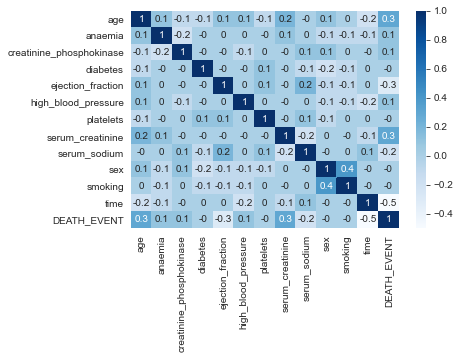

In [128]:
sns.heatmap(round(df.corr(),1), annot=True, cmap='Blues')

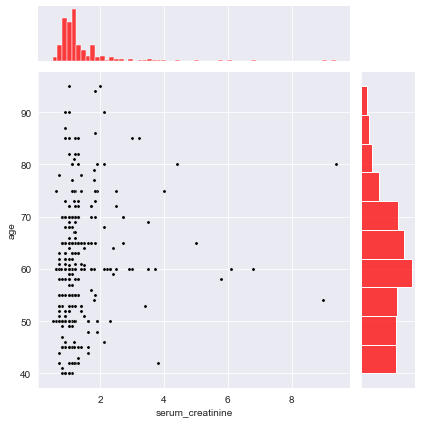

In [129]:
sns.jointplot(x=df['serum_creatinine'], y=df['age'], 
              joint_kws={'alpha':1,'s':10,'color':'black'},
              marginal_kws={'color':'red'})

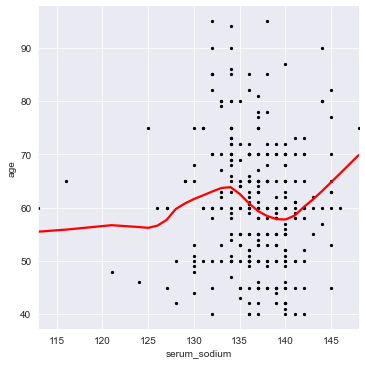

In [130]:
sns.lmplot(data = df, x = 'serum_sodium', y = 'age', 
           lowess=True, 
           scatter_kws={'alpha':1, 's':5,'color':'black'}, 
           line_kws={'color':'red'})

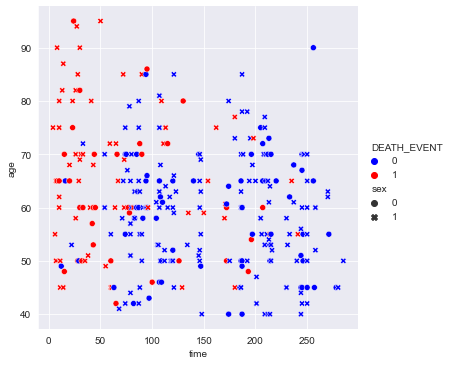

In [131]:
sns.relplot(data=df, x="time", y="age", 
            hue='DEATH_EVENT', style="sex", alpha=1, palette = ['b', 'r']);

## Normalization

In [132]:
import warnings
warnings.filterwarnings('ignore')
cols = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','DEATH_EVENT']
for column in cols[:-1]:
    df[column] = (df[column] - df[column].mean())/df[column].std()

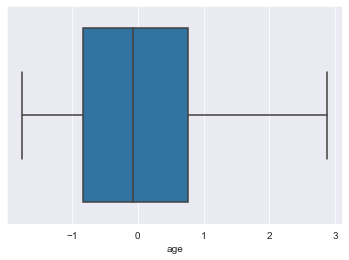

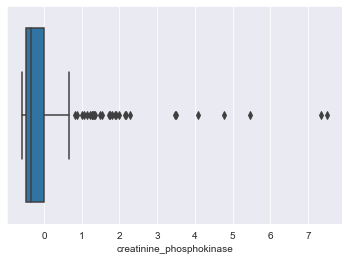

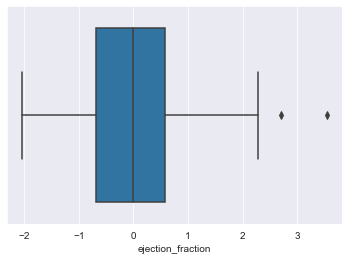

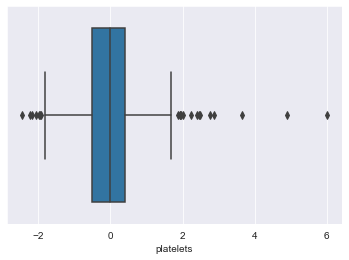

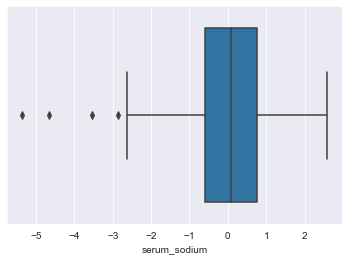

<Figure size 432x288 with 0 Axes>

In [133]:
for column in cols[:-3:2]:
    sns.boxplot(df[column])
    plt.figure()

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

## Classification

In [135]:
import random
Y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values

num_samples = X.shape[0]
train_samples = int(0.8*num_samples)
indexes = np.arange(num_samples)
random.shuffle(indexes)

X, Y = X[indexes], Y[indexes]
X_train, Y_train = X[:train_samples, :], Y[:train_samples]
X_test, Y_test = X[train_samples:, :], Y[train_samples:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(239, 12) (239,)
(60, 12) (60,)


## KNN

<AxesSubplot:xlabel='k_neighbores', ylabel='f1_scores'>

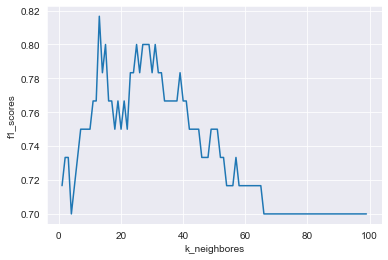

In [136]:
scores = list()
neighbors = list()

for i in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    Y_predict = neigh.predict(X_test)
    _score = f1_score(Y_predict, Y_test, average="micro")
    scores.append(_score)
    neighbors.append(i)
    
df = pd.DataFrame({"f1_scores": scores, "k_neighbores": neighbors})
sns.lineplot(y="f1_scores", x="k_neighbores", data=df)

## Decision Tree

Confusion matrix SVC linear :
[[34  8]
 [ 8 10]]
Classification report DecisionTreeClassifier:
              precision    recall  f1-score   support

     class 0       0.81      0.81      0.81        42
     class 1       0.56      0.56      0.56        18

    accuracy                           0.73        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.73      0.73      0.73        60



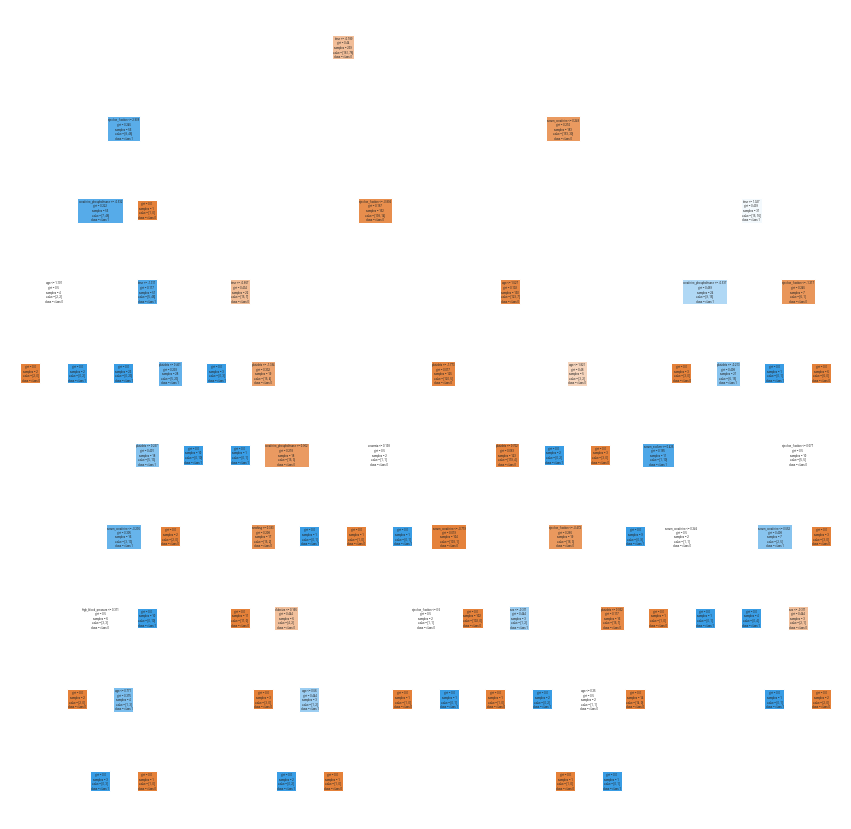

In [137]:
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))

target_names = ['class 0', 'class 1']

print("Classification report DecisionTreeClassifier:")
print(classification_report(Y_test, Y_predict, target_names=target_names))

plt.figure(figsize = (15, 15))
plot_tree(clf, feature_names = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','DEATH_EVENT'], 
          class_names = ['class 0', 'class 1'], filled = True)
plt.show()

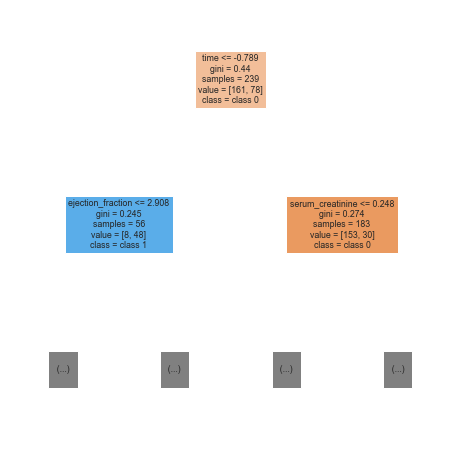

In [138]:
plt.figure(figsize = (8, 8))
plot_tree(clf, max_depth = 1, feature_names = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','DEATH_EVENT'], 
          class_names = ['class 0', 'class 1'], filled = True)
plt.show()

# SVM

In [139]:
parameters = {'C': [1, 10, 100, 1000]}
neigh = SVC(kernel='linear')

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix SVC linear :")
print(confusion_matrix(Y_test, Y_predict))

target_names = ['class 0', 'class 1']

print("Classification report SVC linear :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix SVC linear :
[[37  5]
 [ 6 12]]
Classification report SVC linear :
              precision    recall  f1-score   support

     class 0       0.86      0.88      0.87        42
     class 1       0.71      0.67      0.69        18

    accuracy                           0.82        60
   macro avg       0.78      0.77      0.78        60
weighted avg       0.81      0.82      0.82        60

{'C': 1}


## Random forest

In [140]:
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90]}
neigh = RandomForestClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix Random Forest :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report Random Forest :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix Random Forest :
[[40  2]
 [ 4 14]]
Classification report Random Forest :
              precision    recall  f1-score   support

     class 0       0.91      0.95      0.93        42
     class 1       0.88      0.78      0.82        18

    accuracy                           0.90        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.90      0.90      0.90        60

{'n_estimators': 90}


## Adaboost

In [144]:
parameters = {'n_estimators': [5, 10, 40, 50, 60, 80, 90], "learning_rate": [0.01, 0.1, 0.5, 1]}
neigh = AdaBoostClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

print("Confusion matrix AdaBoost :")
print(confusion_matrix(Y_test, Y_predict))

print("Classification report AdaBoost :")
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(clf.best_params_)

Confusion matrix AdaBoost :
[[39  3]
 [ 6 12]]
Classification report AdaBoost :
              precision    recall  f1-score   support

     class 0       0.87      0.93      0.90        42
     class 1       0.80      0.67      0.73        18

    accuracy                           0.85        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.85      0.85      0.85        60

{'learning_rate': 0.01, 'n_estimators': 5}
